# Note may witness phase shift.. needs more testing

In [1]:
import pandas as pd
from pathlib import Path
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import *
import seaborn as sns
from pylab import rcParams
from sklearn.utils import shuffle
from pdb import set_trace
import matplotlib.pylab as plt
import sys
from sklearn.preprocessing import MinMaxScaler

In [2]:
sys.path.append('/home/aggelos-i3/ForecastingLib/')
from SequenceSpliter import SequenceSpliter
from utils import utilities

In [3]:
rcParams['figure.figsize'] = 11, 7
sns.set()

## Pipeline for the training dataset

In [4]:
LOOKBACK = 100
LOOK_AHEAD = 1
error_type = 3

In [5]:
features = ['acceleration (actual) [m/(s*s)]', 'voltage [V]', 'energy balance[kWh]']
pathlist = Path("/home/aggelos-i3/Downloads/simu Elbas/7h33NO").glob(
    '**/*.xls')

### Get average voltage over every scenario

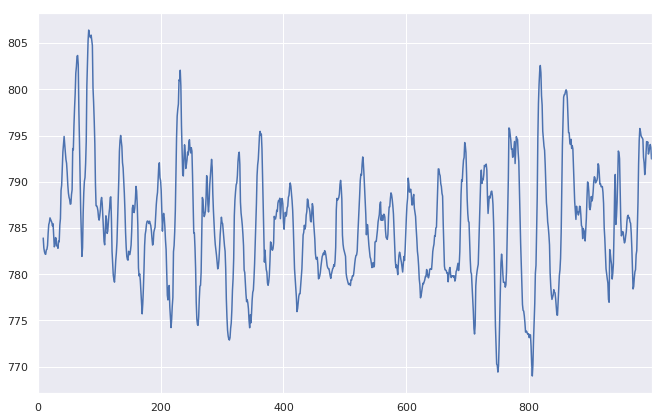

In [6]:
df_normal_voltage = pd.DataFrame()
pathlist = Path("/home/aggelos-i3/Downloads/simu Elbas/7h33NO").glob(
    '**/*.xls')
for path in pathlist:
    # because path is object not string
    path_in_str = str(path)
    df = pd.read_csv(path_in_str, delimiter='\t')
    df = df[['voltage [V]']][:1000].transpose()
    #df = df.set_index("loc. (actual) [km]")
    # df.dropna(inplace=True)
    # df.sort_index(inplace=True)
    if df_normal_voltage.empty:
        df_normal_voltage = df
    else:
        df_normal_voltage = df_normal_voltage.append(df)
    df_normal_voltage['label'] = np.zeros(
        (len(df_normal_voltage), 1)).astype(int)

#taking the average of all values for each timestep
avg_normal = df_normal_voltage.drop("label", axis=1).mean(axis=0)

# Tail-rolling average transform
rolling = avg_normal.rolling(window=10)
rolling_mean = rolling.mean()

rolling_mean.plot()

### Get average accelation over all scenarios for training

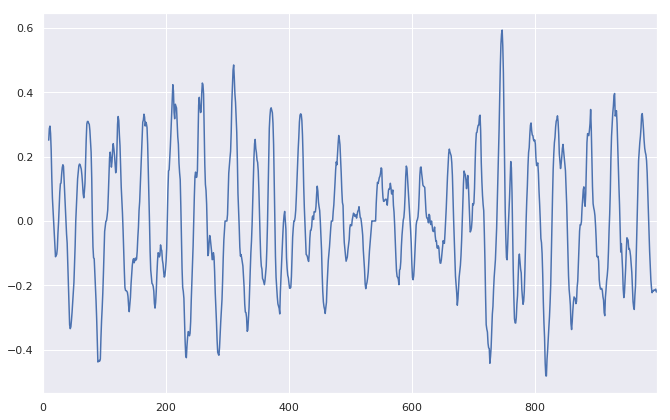

In [7]:
#i will do the same for the acceleration
df_normal_acceleration = pd.DataFrame()
pathlist = Path("/home/aggelos-i3/Downloads/simu Elbas/7h33NO").glob(
    '**/*.xls')
for path in pathlist:
    # because path is object not string
    path_in_str = str(path)
    df = pd.read_csv(path_in_str, delimiter='\t')
    df = df[['acceleration (actual) [m/(s*s)]']][:1000].transpose()
    #df = df.set_index("loc. (actual) [km]")
    # df.dropna(inplace=True)
    # df.sort_index(inplace=True)
    if df_normal_acceleration.empty:
        df_normal_acceleration = df
    else:
        df_normal_acceleration = df_normal_acceleration.append(df)
    df_normal_acceleration['label'] = np.zeros(
        (len(df_normal_acceleration), 1)).astype(int)

avg_normal_acceleration = df_normal_acceleration.drop("label",
                                                      axis=1).mean(axis=0)
rolling_acc = avg_normal_acceleration.rolling(window=10)
rolling_mean_acc = rolling_acc.mean()

rolling_mean_acc.plot()

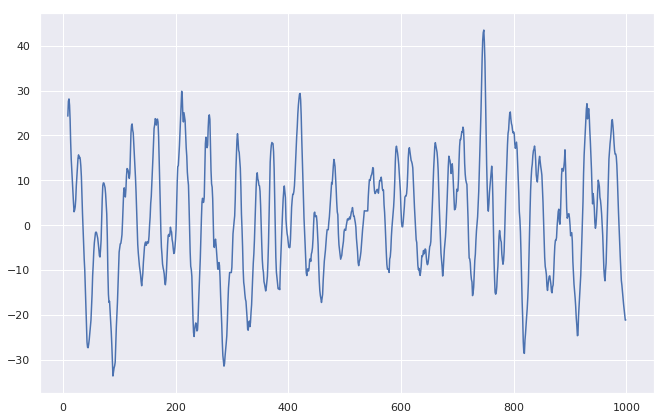

In [8]:
#i will do the same for the tractive effort
df_normal_tractive_eff = pd.DataFrame()
pathlist = Path("/home/aggelos-i3/Downloads/simu Elbas/7h33NO").glob(
    '**/*.xls')
for path in pathlist:
    # because path is object not string
    path_in_str = str(path)
    df = pd.read_csv(path_in_str, delimiter='\t')
    df = df[['tractive effort (actual) [kN]']][:1000].transpose()
    #df = df.set_index("loc. (actual) [km]")
    # df.dropna(inplace=True)
    # df.sort_index(inplace=True)
    if df_normal_tractive_eff.empty:
        df_normal_tractive_eff = df
    else:
        df_normal_tractive_eff = df_normal_tractive_eff.append(df)
    df_normal_tractive_eff['label'] = np.zeros(
        (len(df_normal_tractive_eff), 1)).astype(int)

avg_normal_tractive_eff = df_normal_tractive_eff.drop("label",
                                                      axis=1).mean(axis=0)
rolling_tract_eff = avg_normal_tractive_eff.rolling(window=10)
rolling_mean_tract_eff = rolling_tract_eff.mean()
plt.plot(rolling_mean_tract_eff)

## Get an example voltage of an abnormal scenario for testing

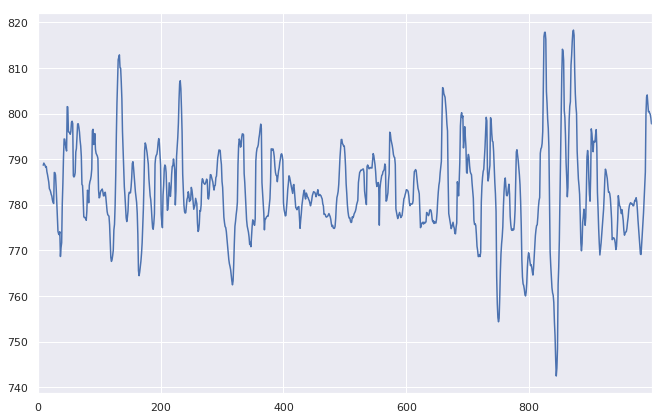

In [9]:
df_error_voltage = pd.DataFrame()
pathlist = Path(f"/home/aggelos-i3/Downloads/simu Elbas/7h33D{error_type}").glob(
    '**/*.xls')
for path in pathlist:
    # because path is object not string
    path_in_str = str(path)
    df = pd.read_csv(path_in_str, delimiter='\t')
    df = df[['voltage [V]']][:1000].transpose()
    #df = df.set_index("loc. (actual) [km]")
    # df.dropna(inplace=True)
    if df_error_voltage.empty:
        df_error_voltage = df
    else:
        df_error_voltage = df_error_voltage.append(df)
df_error_voltage['label'] = np.full((len(df_error_voltage), 1), 1)

#avg_error = df_error_voltage.drop("label", axis=1).mean(axis=0)
rolling_voltage_abnormal = df_error_voltage.drop(
    "label", axis=1).iloc[1].rolling(window=10).mean()
# Tail-rolling average transform
#rolling_error = avg_error.rolling(window=10)
#rolling_mean_error = rolling_error.mean()

rolling_voltage_abnormal.plot()

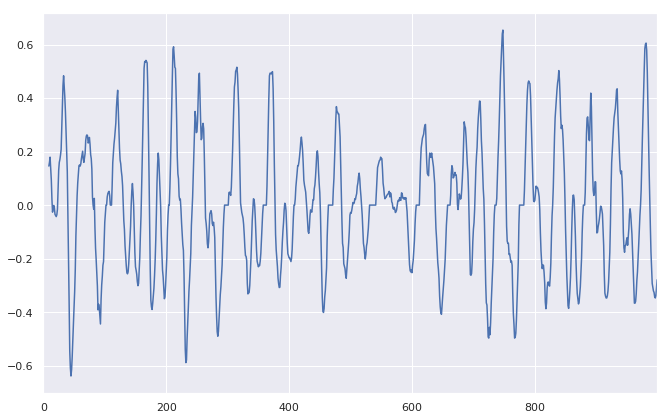

In [10]:
#i will do the same for the acceleration
df_error_acceleration = pd.DataFrame()
pathlist = Path(f"/home/aggelos-i3/Downloads/simu Elbas/7h33D{error_type}").glob(
    '**/*.xls')
for path in pathlist:
    # because path is object not string
    path_in_str = str(path)
    df = pd.read_csv(path_in_str, delimiter='\t')
    df = df[['acceleration (actual) [m/(s*s)]']][:1000].transpose()
    #df = df.set_index("loc. (actual) [km]")
    # df.dropna(inplace=True)
    # df.sort_index(inplace=True)
    if df_error_acceleration.empty:
        df_error_acceleration = df
    else:
        df_error_acceleration = df_error_acceleration.append(df)
    df_error_acceleration['label'] = np.zeros(
        (len(df_error_acceleration), 1)).astype(int)

#avg_error_acceleration = df_error_acceleration.drop("label", axis=1).mean(axis=0)
#rolling_acc_error = avg_error_acceleration.rolling(window=10)
rolling_acc_abnormal = df_error_acceleration.drop(
    "label", axis=1).iloc[1].rolling(window=10).mean()
#rolling_mean_acc_error = rolling_acc_error.mean()

rolling_acc_abnormal.plot()

In [11]:
#i will do the same for the tractive effort
df_abnormal_tractive_eff = pd.DataFrame()
pathlist = Path(f"/home/aggelos-i3/Downloads/simu Elbas/7h33D{error_type}").glob(
    '**/*.xls')
for path in pathlist:
    # because path is object not string
    path_in_str = str(path)
    df = pd.read_csv(path_in_str, delimiter='\t')
    df = df[['tractive effort (actual) [kN]']][:1000].transpose()
    #df = df.set_index("loc. (actual) [km]")
    # df.dropna(inplace=True)
    # df.sort_index(inplace=True)
    if df_abnormal_tractive_eff.empty:
        df_abnormal_tractive_eff = df
    else:
        df_abnormal_tractive_eff = df_abnormal_tractive_eff.append(df)
    df_abnormal_tractive_eff['label'] = np.zeros(
        (len(df_abnormal_tractive_eff), 1)).astype(int)

avg_abnormal_tractive_eff = df_abnormal_tractive_eff.drop("label",
                                                      axis=1).mean(axis=0)
mean_rolling_tract_eff_abnormal = avg_abnormal_tractive_eff.rolling(window=10).mean()


In [12]:
#i will do the same for the distance
df_normal_distance = pd.DataFrame()
pathlist = Path("/home/aggelos-i3/Downloads/simu Elbas/7h33NO").glob(
    '**/*.xls')
for path in pathlist:
    # because path is object not string
    path_in_str = str(path)
    df = pd.read_csv(path_in_str, delimiter='\t')
    df = df[['loc. (actual) [km]']][:1000].transpose()
    #df = df.set_index("loc. (actual) [km]")
    # df.dropna(inplace=True)
    # df.sort_index(inplace=True)
    if df_normal_distance.empty:
        df_normal_distance = df
    else:
        df_normal_distance = df_normal_distance.append(df)
    df_normal_distance['label'] = np.zeros(
        (len(df_normal_distance), 1)).astype(int)

avg_normal_distance = df_normal_distance.drop("label", axis=1)

In [13]:
avg_normal_distance = df_normal_distance.drop("label", axis=1)
for i in range(len(avg_normal_distance)):
    # set_trace()
    if avg_normal_distance.iloc[i][0] < 500:
        avg_normal_distance.iloc[i].replace(avg_normal_distance.iloc[i][::-1],
                                            inplace=True)
#rolling = avg_normal.rolling(window=10)
#rolling_mean = rolling.mean()

#rolling_mean.plot()

In [14]:
distance = avg_normal_distance.iloc[0]  #not average but will do

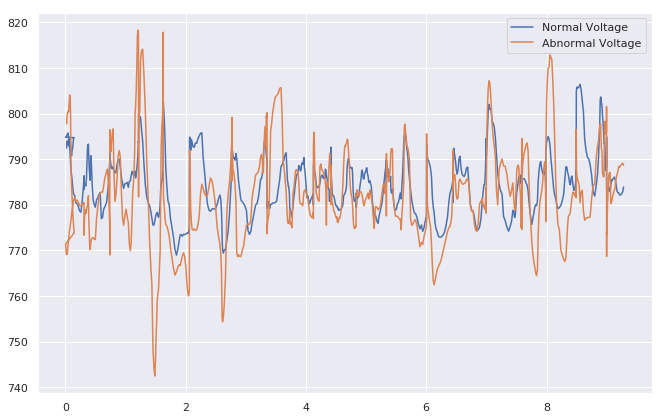

In [15]:
plt.plot(distance, rolling_mean, label='Normal Voltage')
plt.plot(distance, rolling_voltage_abnormal, label='Abnormal Voltage')
plt.legend(loc='best')

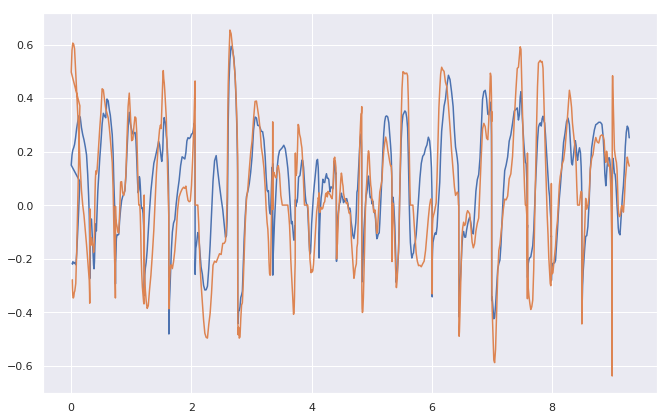

In [16]:
plt.plot(distance, rolling_mean_acc, label='Normal Acceleration')
plt.plot(distance, rolling_acc_abnormal, label='Abnormal Acceleration')

In [17]:
df = pd.DataFrame({
    'Voltage': rolling_mean,
    'Acceleration': rolling_mean_acc,
    "Location": distance,
    "Tract_effort": rolling_mean_tract_eff,
})
df = df.dropna()

In [18]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = StandardScaler()

In [19]:
scaler = scaler.fit(df)
df_scaled = scaler.transform(df)
#df_scaled = df

In [20]:
spliter = SequenceSpliter(lookback=LOOKBACK, look_ahead=LOOK_AHEAD)

In [21]:
X, y = spliter.split(df_scaled)
X = X[:, :, 1:]


In [22]:
# we need to forecast only the voltage
y = y[:, :, 0]

In [23]:
np.save("train_X", X)
np.save("train_y", y)

In [36]:
# now we will build our simple forecasting model
inputs = Input(shape=(X.shape[1:]))
x = GRU(256, recurrent_dropout=0.2, return_sequences=True)(inputs)
x = BatchNormalization()(x)
x =  Dropout(0.4)(x)
x = GRU(90, return_sequences=False)(x)
x = Dropout(0.8)(x)
#x = BatchNormalization()(x)
outs = Dense(LOOK_AHEAD)(x)
model = tf.keras.Model(inputs, outs)
model.compile(loss='mse', optimizer='adam')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 100, 3)            0         
_________________________________________________________________
gru_4 (GRU)                  (None, 100, 256)          199680    
_________________________________________________________________
batch_normalization_2 (Batch (None, 100, 256)          1024      
_________________________________________________________________
dropout_4 (Dropout)          (None, 100, 256)          0         
_________________________________________________________________
gru_5 (GRU)                  (None, 90)                93690     
_________________________________________________________________
dropout_5 (Dropout)          (None, 90)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 91        
Total para

In [37]:
history = model.fit(X, y, epochs=10, validation_split=0.1)

Train on 801 samples, validate on 90 samples
Epoch 1/10
801/801 [==============================] - 5s 6ms/step - loss: 2.6041 - val_loss: 0.8746
Epoch 2/10
801/801 [==============================] - 4s 5ms/step - loss: 2.3549 - val_loss: 0.8245
Epoch 3/10
801/801 [==============================] - 4s 5ms/step - loss: 1.9447 - val_loss: 0.8513
Epoch 4/10
801/801 [==============================] - 4s 5ms/step - loss: 1.7277 - val_loss: 0.6641
Epoch 5/10
801/801 [==============================] - 4s 5ms/step - loss: 1.5036 - val_loss: 0.8491
Epoch 6/10
801/801 [==============================] - 4s 5ms/step - loss: 1.4618 - val_loss: 0.6316
Epoch 7/10
801/801 [==============================] - 4s 5ms/step - loss: 1.2321 - val_loss: 0.7733
Epoch 8/10
801/801 [==============================] - 4s 5ms/step - loss: 1.2854 - val_loss: 0.6470
Epoch 9/10
801/801 [==============================] - 4s 5ms/step - loss: 1.2950 - val_loss: 0.6300
Epoch 10/10
801/801 [==============================] - 

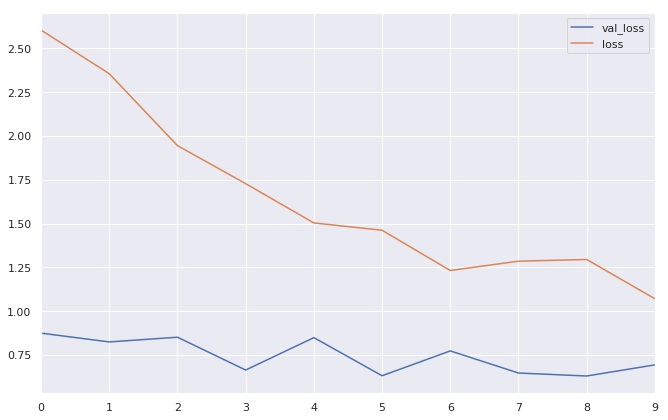

In [38]:
history = pd.DataFrame(history.history)
history.plot()

Now we have our model. We can test it on the faulty data to see the difference. We will do this test both with the raw voltage dataset and also with the rolling mean dataset.

In [39]:
df_faulty = pd.DataFrame({
    "Voltage": rolling_voltage_abnormal,
    "Acceleration": rolling_acc_abnormal,
    "Location": distance,
    "Tract_effort": mean_rolling_tract_eff_abnormal
})
df_faulty.dropna(inplace=True)
df_scaled_faulty = scaler.transform(df_faulty)
X_test, y_test = spliter.split(df_scaled_faulty)
X_test = X_test[:, :, 1:]
y_test = y_test[:, :, 0]

In [40]:
yhat = model.predict(X_test)

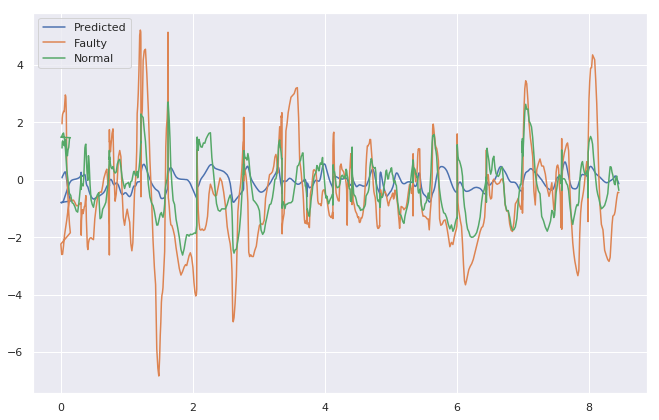

In [46]:
plt.plot(distance[-len(yhat):], yhat, label='Predicted')
plt.plot(distance[-len(yhat):], y_test, label='Faulty')
plt.plot(distance[-len(yhat):], y, label='Normal')
plt.legend(loc='best')

In [42]:
yhat = yhat.reshape(yhat.shape[0]) 
y = y.reshape(y.shape[0])
y_test = y_test.reshape(y_test.shape[0]) 

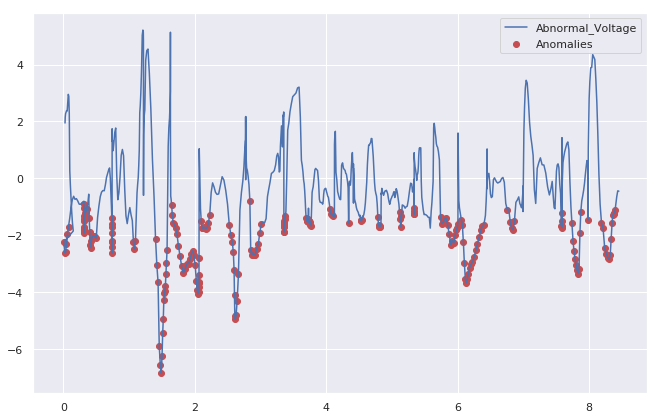

In [43]:
anomaly = y_test < yhat - 4 * yhat.std()
plt.plot(distance[-len(yhat):], y_test, label='Abnormal_Voltage')
plt.scatter(distance[-len(yhat):],
            np.where(anomaly, y_test, None),
            c='r',
            label='Anomalies')
plt.legend(loc='best')

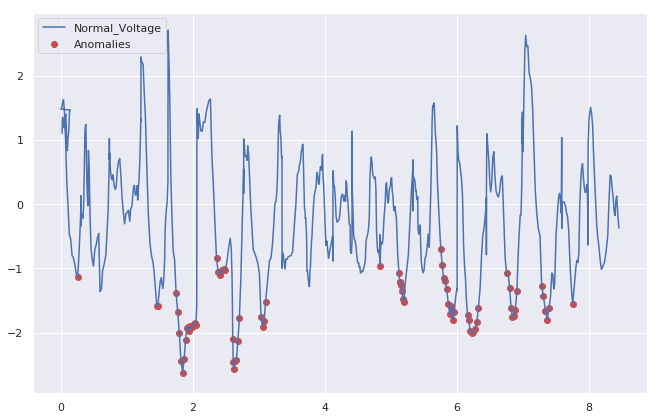

In [44]:
anomaly = y < yhat - 4 * yhat.std()
plt.plot(distance[-len(yhat):], y, label='Normal_Voltage')
plt.scatter(distance[-len(yhat):],
            np.where(anomaly, y, None),
            c='r',
            label='Anomalies')
plt.legend(loc='best')

In [ ]:
AbNorm_Error = (yhat - y_test)/(y_test)

Norm_Error = (yhat - y)/(y)
diff = AbNorm_Error - Norm_Error
plt.scatter(distance[-len(yhat):],AbNorm_Error, label='Abnormal Prediction Error')
plt.scatter(distance[-len(yhat):],Norm_Error, label='Normal Prediction Error')

plt.legend(loc='best')

## Below is the optimization of the model hyperparameters

In [484]:
def create_model(input_cells, rec_dropout):
    model = Sequential([GRU(input_cells, recurrent_dropout=rec_dropout, return_sequences=True, input_shape=(100, 2)),
                        BatchNormalization(),
                        Dropout(0.4),
                        GRU(90, recurrent_dropout=rec_dropout),
                        Dropout(0.8),
                        Dense(1)])
    
    model.compile(loss='mse', optimizer=optimizer(0.01))
    return model
    

In [490]:
optimizer = tf.keras.optimizers.Adam
lr = 0.01
cells = 90
input_cells = 256
dropout = 0.8
rec_dropout = 0.2
grid_param = {
              'input_cells': input_cells,
              'rec_dropout': rec_dropout}

In [486]:
from tensorflow.keras.models import Sequential

In [487]:
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

model = KerasRegressor(build_fn=create_model, epochs=20, batch_size=64, verbose=0)

grid = RandomizedSearchCV(estimator=model, param_distributions=grid_param, n_jobs=-1)
search_result= grid.fit(X,y)

/home/aggelos-i3/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [488]:
# summarize results
print("Best: %f using %s" % (search_result.best_score_, search_result.best_params_))
means = search_result.cv_results_['mean_test_score']
stds = search_result.cv_results_['std_test_score']
params = search_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.748032 using {'rec_dropout': 0.2, 'input_cells': 256}
-0.828523 (0.325196) with: {'rec_dropout': 0.09, 'input_cells': 64}
-0.748032 (0.315094) with: {'rec_dropout': 0.2, 'input_cells': 256}
-0.883788 (0.340015) with: {'rec_dropout': 0.2, 'input_cells': 128}
-0.905930 (0.159955) with: {'rec_dropout': 0.09, 'input_cells': 128}
-0.854425 (0.386655) with: {'rec_dropout': 0.3, 'input_cells': 256}
-0.936953 (0.307208) with: {'rec_dropout': 0.12, 'input_cells': 256}
-0.807321 (0.305285) with: {'rec_dropout': 0.6, 'input_cells': 64}
-0.988654 (0.254102) with: {'rec_dropout': 0.09, 'input_cells': 256}
-0.899600 (0.411238) with: {'rec_dropout': 0.09, 'input_cells': 512}
-1.027738 (0.323875) with: {'rec_dropout': 0.3, 'input_cells': 512}


In [492]:
model = Sequential([GRU(input_cells, recurrent_dropout=rec_dropout, return_sequences=True, input_shape=(100, 2)),
                    BatchNormalization(),
                    Dropout(0.4),
                    GRU(90, recurrent_dropout=rec_dropout),
                    Dropout(0.8),
                    Dense(1)])

model.compile(loss='mse', optimizer=optimizer(0.01))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_35 (GRU)                 (None, 100, 256)          198912    
_________________________________________________________________
batch_normalization_5 (Batch (None, 100, 256)          1024      
_________________________________________________________________
dropout_30 (Dropout)         (None, 100, 256)          0         
_________________________________________________________________
gru_36 (GRU)                 (None, 90)                93690     
_________________________________________________________________
dropout_31 (Dropout)         (None, 90)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 91        
Total params: 293,717
Trainable params: 293,205
Non-trainable params: 512
_________________________________________________________________


Train on 801 samples, validate on 90 samples
Epoch 1/20
801/801 [==============================] - 7s 9ms/step - loss: 4.6946 - val_loss: 0.6916
Epoch 2/20
801/801 [==============================] - 4s 5ms/step - loss: 1.3679 - val_loss: 0.6392
Epoch 3/20
801/801 [==============================] - 4s 5ms/step - loss: 1.0213 - val_loss: 0.9262
Epoch 4/20
801/801 [==============================] - 4s 5ms/step - loss: 1.0236 - val_loss: 0.8723
Epoch 5/20
801/801 [==============================] - 4s 5ms/step - loss: 1.0082 - val_loss: 1.0173
Epoch 6/20
801/801 [==============================] - 4s 5ms/step - loss: 0.9104 - val_loss: 0.7296
Epoch 7/20
801/801 [==============================] - 4s 5ms/step - loss: 0.8362 - val_loss: 1.1189
Epoch 8/20
801/801 [==============================] - 4s 5ms/step - loss: 0.7844 - val_loss: 0.9511
Epoch 9/20
801/801 [==============================] - 4s 5ms/step - loss: 0.7436 - val_loss: 0.5312
Epoch 10/20
801/801 [==============================] - 

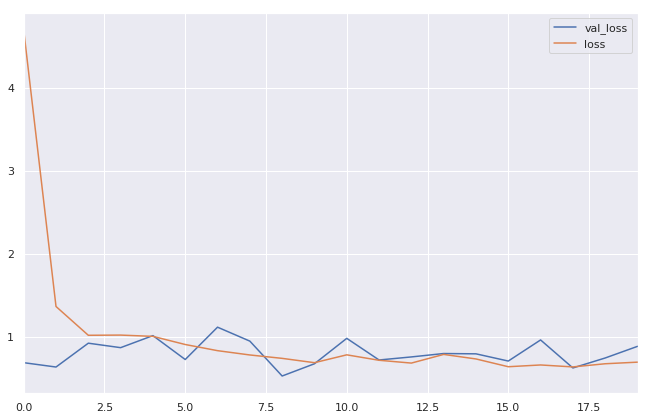

In [493]:
history = model.fit(X, y, epochs=20, validation_split=0.1)
history = pd.DataFrame(history.history)
history.plot()